# Download and EDA

Let's do a sentiment analysis of a dataset of Amazon reviews for video games.

### 1. Load data
The next code reads the data into a pandas data frame:

In [1]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('./reviews_Video_Games_5.json.gz')

df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011"
5,A2UTRVO4FDCBH6,0700099867,A.R.G.,"[0, 0]","Overall this is a well done racing game, with ...",4.0,"Good racing game, terrible Windows Live Requir...",1368230400,"05 11, 2013"
6,AN3YYDZAS3O1Y,0700099867,Bob,"[11, 13]",Loved playing Dirt 2 and I thought the graphic...,5.0,A step up from Dirt 2 and that is terrific!,1313280000,"08 14, 2011"
7,AQTC623NCESZW,0700099867,Chesty Puller,"[1, 4]",I can't tell you what a piece of dog**** this ...,1.0,Crash 3 is correct name AKA Microsoft,1353715200,"11 24, 2012"
8,A1QJJU33VNC4S7,0700099867,D@rkFX,"[0, 1]",I initially gave this one star because it was ...,4.0,A great game ruined by Microsoft's account man...,1352851200,"11 14, 2012"
9,A2JLT2WY0F2HVI,0700099867,D. Sweetapple,"[1, 1]",I still haven't figured this one out. Did ever...,2.0,Couldn't get this one to work,1391817600,"02 8, 2014"


In [2]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [3]:
data = df.drop(['reviewerID', 'asin', 'reviewerName', 'helpful',
       'summary', 'unixReviewTime', 'reviewTime'], axis=1)

In [4]:
data.head()

,reviewText,overall
0,Installing the game was a struggle (because of...,1.0
1,If you like rally cars get this game you will ...,4.0
2,1st shipment received a book instead of the ga...,1.0
3,"I got this version instead of the PS3 version,...",3.0
4,I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0


In [7]:
data.isnull().sum().sum()

0

In [8]:
data.head()

,reviewText,overall
0,Installing the game was a struggle (because of...,1.0
1,If you like rally cars get this game you will ...,4.0
2,1st shipment received a book instead of the ga...,1.0
3,"I got this version instead of the PS3 version,...",3.0
4,I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0


In [9]:
data.shape

(231780, 2)

### 2. Vocabulary Cardinality

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
#nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()
import os

In [11]:
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
   
    # Convertimos a minúscula y quitamos todo lo que no sea texto o números
    text = re.sub(r"[^a-zA-Z0-9]", " ", review.lower())
    # Dividimos por espacios
    words = text.split()
    # Eliminamos stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # Aplicamos stemming
    words = [PorterStemmer().stem(w) for w in words]

    return words

In [12]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")
os.makedirs(cache_dir, exist_ok=True)

def preprocess_data(data_train, labels_train, 
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass
    
    if cache_data is None:
        words_train = list(map(review_to_words, data_train))
        
        
        if cache_file is not None:
            cache_data = dict(words_train=words_train, 
                              labels_train=labels_train)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        words_train, labels_train = (cache_data['words_train'],
               cache_data['labels_train'])
    
    return words_train,labels_train


words_train, labels_train = preprocess_data(
        data["reviewText"], data["overall"])



Read preprocessed data from cache file: preprocessed_data.pkl


In [13]:
print("\n--- Raw review ---")
print(data["reviewText"][1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])


--- Raw review ---
If you like rally cars get this game you will have fun.It is more oriented to &#34;European market&#34; since here in America there isn't a huge rally fan party. Music it is very European and even the voices from the game very &#34;English&#34; accent.The multiplayer isn't the best but it works just ok.

--- Preprocessed words ---
['like', 'ralli', 'car', 'get', 'game', 'fun', 'orient', '34', 'european', 'market', '34', 'sinc', 'america', 'huge', 'ralli', 'fan', 'parti', 'music', 'european', 'even', 'voic', 'game', '34', 'english', '34', 'accent', 'multiplay', 'best', 'work', 'ok']

--- Label ---
4.0


In [14]:
len(words_train)

231780

In [15]:
flat_list = [item for sublist in words_train for item in sublist]

In [16]:
wf = Counter(flat_list)

In [17]:
len(wf)

162951

In [18]:
total_words= [y for review in data["reviewText"] for y in review.lower().split()]

In [19]:
wf2 = Counter(total_words)
len(wf2)

1016594

**Without using techniques that reduce the cardinality of our corpus, such as lemmatization or normalization, we have obtained a set of 1016594 tokens. While, applying general stopwords and lemmatization techniques, we have obtained 162951 tokens**

In [20]:
#del total_words, wf2

### 3. Distribution of reviews by stars and by positive/negative

In [21]:
data.dtypes

reviewText     object
overall       float64
dtype: object

array([[<AxesSubplot:title={'center':'overall'}>]], dtype=object)

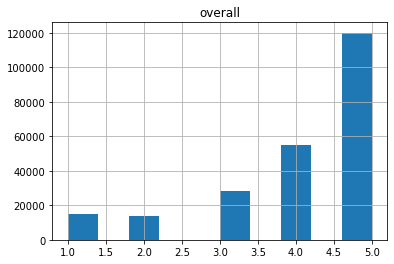

In [22]:
data.hist(column="overall")

In [23]:
def label_sentiment(row):
    if int(row['overall']) > 2:
        return 1
    else:
        return 0

In [24]:
data['sentiment_label'] = df.apply(lambda row: label_sentiment(row), axis=1)
data.head()

,reviewText,overall,sentiment_label
0,Installing the game was a struggle (because of...,1.0,0
1,If you like rally cars get this game you will ...,4.0,1
2,1st shipment received a book instead of the ga...,1.0,0
3,"I got this version instead of the PS3 version,...",3.0,1
4,I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,1


array([[<AxesSubplot:title={'center':'sentiment_label'}>]], dtype=object)

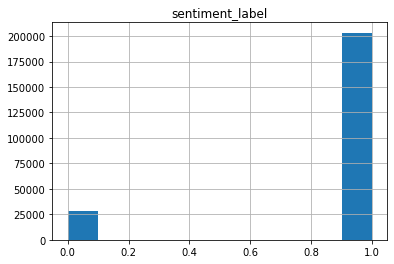

In [25]:
data.hist(column="sentiment_label")

In [26]:
posi = round(data["sentiment_label"].value_counts()[1]/data.shape[0],2)
neg = round(data["sentiment_label"].value_counts()[0]/data.shape[0],2)
print('Percentage of negatives: {}\nPercentage of positives: {}'.format(neg, posi))

Percentage of negatives: 0.12
Percentage of positives: 0.88


There is a clear imbalance between the number of positive and negative reviews. In the conclusions of this notebook we will take this point into account.

### 3. N-Grams most frequent

In [27]:
from nltk import ngrams
from nltk.probability import FreqDist

We are going to extract the trigrams and bigrams from the processed corpus (flat_list)

In [28]:
bigrams_ = list(ngrams(flat_list, 2))
trigrams_ = list(ngrams(flat_list, 3))

In [29]:
def most_commons_grams(n_gram, top=10):
    g_freq = FreqDist(n_gram)
    g_freq.most_common(top)
    return g_freq

In [30]:
most_commons_grams(bigrams_)

FreqDist({('play', 'game'): 38840, ('game', 'play'): 34729, ('game', 'like'): 19741, ('great', 'game'): 18985, ('feel', 'like'): 16669, ('video', 'game'): 16363, ('singl', 'player'): 12941, ('game', 'realli'): 12221, ('good', 'game'): 12170, ('game', 'game'): 12090, ...})

In [31]:
most_commons_grams(trigrams_)

FreqDist({('first', 'person', 'shooter'): 4165, ('game', 'ever', 'play'): 3822, ('one', 'best', 'game'): 2881, ('grand', 'theft', 'auto'): 2562, ('metal', 'gear', 'solid'): 2225, ('singl', 'player', 'campaign'): 2200, ('super', 'mario', 'bro'): 2111, ('best', 'game', 'ever'): 2106, ('highli', 'recommend', 'game'): 1713, ('game', 'lot', 'fun'): 1665, ...})

It seems that interesting n_grams have been obtained. It should be noted that names of some games have come out in the trigrams.

### 4. Word cloud

In [32]:
#!pip install wordcloud

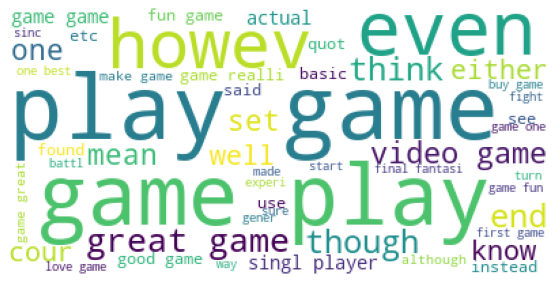

In [33]:
from wordcloud import WordCloud

combined_text = " ".join([word for word in flat_list])
                                                
# Inicializamos el wordcloud
wc = WordCloud(background_color='white', max_words=50)
        # Actualizamos las stopwords para incluir palabras comunes del tema
        #stopwords = STOPWORDS.update(['game','videogame','xbox', 'play', 'pc']))
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

The word cloud indicates that many of the most frequently repeated words are bigrams.

### Embeddings representations

We are going to make a 2D visualization of some word embeddings. We will also see the most similar.

In [34]:
most_commons_grams(flat_list)

FreqDist({'game': 1025284, 'play': 313762, 'like': 250375, 'get': 217226, 'one': 210741, 'time': 168647, 'good': 131586, 'realli': 127409, 'great': 124042, 'use': 123836, ...})

In our Word2Vec we are going to use the CBOW architecture since we have a very large corpus. In addition, the objective is to give the context of the review and from there be able to predict keywords that lead us to the appropriate sentiment label.

For this architecture, we need to set some hyperparameters. Therefore, and in advance, we are going to do some calculations.

In [35]:
# See the mean and maximal words per review

number_words_per_review = [len(listElem) for listElem in words_train]

n_max_words = max(number_words_per_review )
mean_words = sum(number_words_per_review)/len(number_words_per_review)

print(n_max_words)
print(mean_words)

3080
106.31043662093364


(array([2.14244e+05, 1.42550e+04, 2.41800e+03, 5.73000e+02, 1.61000e+02,
        6.00000e+01, 3.90000e+01, 1.10000e+01, 9.00000e+00, 1.00000e+01]),
 array([   0.,  308.,  616.,  924., 1232., 1540., 1848., 2156., 2464.,
        2772., 3080.]),
 <BarContainer object of 10 artists>)

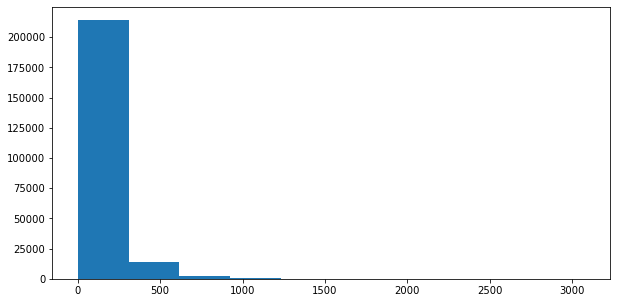

In [36]:
plt.hist(number_words_per_review)

This histogram reflects that most reviews are under 600 words. This data is useful for one of the hypermaparameters.

Note: the application of this histogram could be useful as a method to define outliers and see how it would affect our future models.

In [37]:
!pip install -U gensim

In [38]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
#hyperparameters
cbow_params = {
    'vector_size': 400,
    'window': 6,
    'min_count': 3,
    'sg': 0,
    'hs': 0,
    'negative': 20,
    'workers':6
}
#We initialize the Word2Vec object
w2v_cbow = Word2Vec(**cbow_params)

In [39]:
#w2v_cbow.build_vocab(flat_list)

In [40]:
#corpus = LineSentence(words_train)

In [41]:
#w2v_cbow.train(corpus, total_examples=w2v_cbow.corpus_count, epochs=4)

<font color='red'>The last step creates a crash error on our local computer. This is due to the large corpus we have. In the next point, conclusions, we will see what we can do after this sticking point. </font>

### Conclusions

The data exploration carried out has concluded in two major problems of our dataset.
1. We have a very unbalanced set between positive and negative feedback.
2. The large size of our dataset prevents my machine from processing a word2vec for the corpus.

**For these reasons, I will subsample the positive reviews. Thus, we will balance the two sentiments and drastically reduce the data set.
In addition, both the wordcloud and the frequency of words reveal that there are very common words in all the reviews and that they could be considered as Stopwords (play, game, video, one)**

In [49]:
df_true = data[data['sentiment_label'] == 0]
df_false = data[data['sentiment_label'] == 1]
data_sample = pd.concat([df_true, df_false.sample(df_true.shape[0])])

In [50]:
data_sample.shape

(57032, 3)

In [61]:
data_sample.to_pickle("data_balanced")

In [56]:
#output = pd.read_pickle("data_balanced")
#output["reviewText"]

0         Installing the game was a struggle (because of...
2         1st shipment received a book instead of the ga...
7         I can't tell you what a piece of dog**** this ...
9         I still haven't figured this one out. Did ever...
13        I bought this and the key didn't work.  It was...
                                ...                        
150447    Recently, I acquired the bundle with the class...
8888      If you are trying to decide which video game s...
38468     I rented this game from the library a while ba...
204220    good game met my expectations people still che...
20186     Who would've thought playing a game where you ...
Name: reviewText, Length: 57032, dtype: object